# 서울 자전거 수요량 데이터

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #시각화 패키지
import seaborn as sns #시각화 패키지
plt.style.use('fivethirtyeight') # 테마바꾸기
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

data=pd.read_csv('./SeoulBikeData.csv', engine='python', encoding='CP949')
data.head() # data 확인

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


Date : 일/월/년

Rented Bike count - 시간당 대여 횟수

Hour - 하루 시간

Temperature-섭씨기온

Humidity - 습도(%)

Windspeed - 풍속(m/s)

Visibility - 가시거리(10m)

Dew point temperature - 이슬점(Celsius)

Solar radiation - 자외선 지수(MJ/m2)

Rainfall - 강우량(mm)

Snowfall - 강설량(cm)

Seasons - 계절(Winter, Spring, Summer, Autumn)

Holiday - 주말/평일(Holiday/No holiday)

Functional Day - 비운행일, 운행일 (NoFunc(Non Functional Hours), Fun(Functional hours))

In [2]:
data.isnull().sum() # 전체 결측치 확인

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(캜)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(캜)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

In [3]:
data.describe()

,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Functioning day 변수는 자전거 대여 정책이 실시되는 Yes와 실시하지 않는 No로 구분된다. Functioning day가 1(no)인 날은 자전거 대여가 당연히 0일 수밖에 없고 이에 관련된 다른 변수들이 예측을 위한 분석과정에 포함될 경우 정확도를 낮출 수 있어 Functioning day의 Yes와 No를 0과 1로 변환한 후에 0인 데이터만 선별. 마지막엔 Functioning day 변수를 제거했다.

In [4]:
data['Functioning Day'].replace(['Yes','No'],[0,1],inplace=True)
data=data.loc[data['Functioning Day']==0]
data.head()

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,0


In [5]:
data.drop("Functioning Day",axis=1,inplace=True)

In [6]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday


변수 중에서 설명이 필요할 것 같은 데이터는 time(시간), seasons(계절), visibility(가시성), holiday(휴일 여부), functioning day(정책 실행 여부), rainfall(강수량), Dew point temperature(이슬점), solar radiation(자외선 지수) 등이었다.

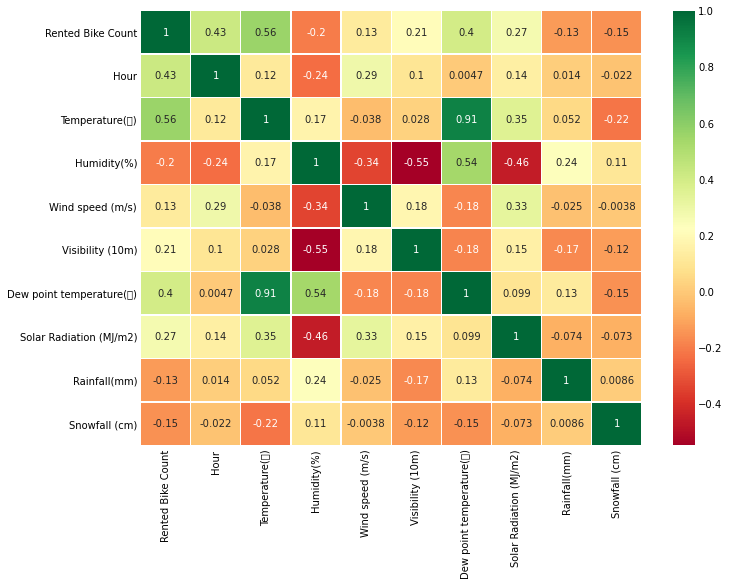

In [7]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 

fig=plt.gcf() # fig에 접근
fig.set_size_inches(10,8) # fig그림 크기 조절
plt.show()

변수들간의 상관관계가 높은 변수들은 다음과 같다.

이슬점 & 온도 : 0.91
가시거리 & 습도 : -0.55
이슬점 & 습도 : 0.54
자외선 지수 & 습도 : -0.46
자전거 대여(target) & 온도 : 0.56
자전거 대여(target) & 시간 : 0.43

이슬점 & 온도의 상관관계가 0.91로써 매우 높게 나왔다.
이는 종속성이 높아 하나의 변수로 둘을 설명할 수 있으니 한 변수를 제거해도 되지 않냐는 의견이 나옴. 거기에 더해 그러면 이 둘을 PCA를 통해 하나의 변수로 생성하면 되지 않냐는 의견이 나옴. 하지만 이는 전체 변수를 중요도에 따른 몇 개의 변수로 줄이는 것이기에 이슬점과 온도의 변수 중에서 하나를 제거해야 한다는 생각과는 다른 종류라고 판단함. 이는 차후 결정을 해봐야 할 것으로 생각됨.

#### Seasons과 Holiday변수는 범주형 자료이므로 원핫인코딩을 적용

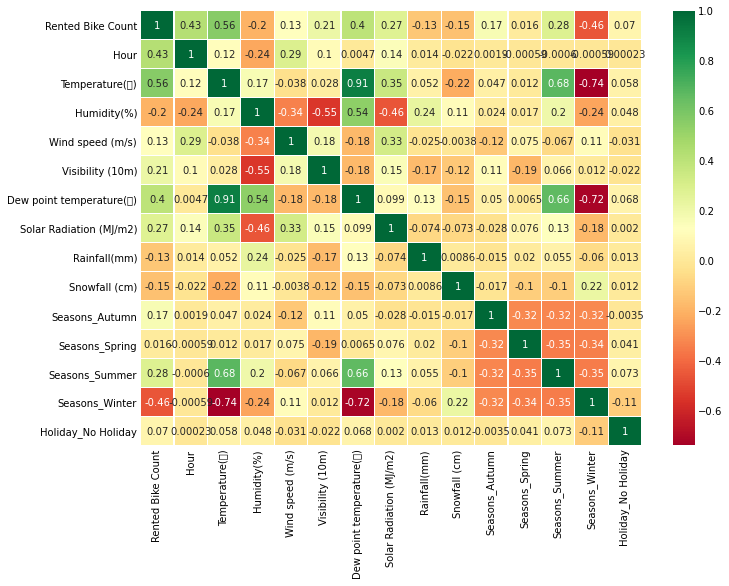

In [8]:
data.drop("Date",axis=1,inplace=True)
data1 = pd.get_dummies(data)
data1.drop("Holiday_Holiday",axis=1,inplace=True)

sns.heatmap(data1.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 

fig=plt.gcf() # fig에 접근
fig.set_size_inches(10,8) # fig그림 크기 조절
plt.show()

seasons랑 holiday는 연속형이 아닌 범주형 자료로서 분석에서 데이터로 고려될 경우 수치적 상관관계 혹은 분석 결과에 영향을 미칠 것 같다는 의견이 나옴.

하지만 이와 같은 생각은 연속형 자료들을 하나의 연산에 대입하는 회귀 분석에 사용되는 개념으로써 패턴을 학습하고 이를 바탕으로 결과를 예측하는 분류에는 알맞지 않다고 판단함.

따라서 seasons 변수랑 holiday 변수의 결과값을 1, 2, 3, 4랑 원핫 인코딩으로 변환.(seasons는 1: spring, 2: summer, 3: fall, 4: winter. holiday는 0: no holiday, 1: holiday)

In [9]:
data['Seasons'].replace(['Spring','Summer','Autumn','Winter'],[1,2,3,4],inplace=True)
data['Holiday'].replace(['No Holiday','Holiday'],[0,1],inplace=True)

data.head()

,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,4,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,4,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,4,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,4,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,4,0


In [10]:
data.describe()

,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
count,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.00000,8465.000000,8465.000000,8465.000000
mean,729.156999,11.507029,12.771057,58.147194,1.725883,1433.873479,3.944997,0.567868,0.14912,0.077685,2.483993,0.048198
std,642.351166,6.920899,12.104375,20.484839,1.034281,609.051229,13.242399,0.868245,1.12554,0.444063,1.127194,0.214198
min,2.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.00000,0.000000,1.000000,0.000000
25%,214.000000,6.000000,3.000000,42.000000,0.900000,935.000000,-5.100000,0.000000,0.00000,0.000000,1.000000,0.000000
50%,542.000000,12.000000,13.500000,57.000000,1.500000,1690.000000,4.700000,0.010000,0.00000,0.000000,2.000000,0.000000
75%,1084.000000,18.000000,22.700000,74.000000,2.300000,2000.000000,15.200000,0.930000,0.00000,0.000000,4.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.00000,8.800000,4.000000,1.000000


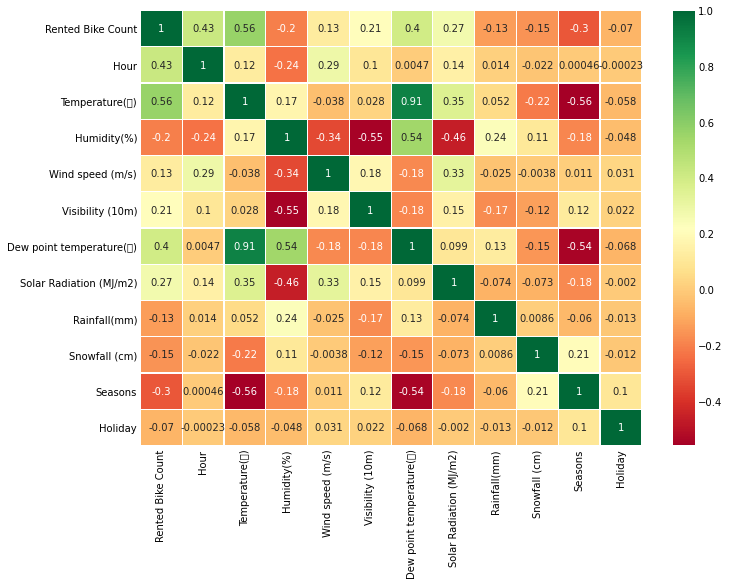

In [11]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 

fig=plt.gcf() # fig에 접근
fig.set_size_inches(10,8) # fig그림 크기 조절
plt.show()

통계학에서는 결과값(정확도)와 변수와의 목표를 유의미하게 설명하는 것이 목표.
머신러닝은 정확도를 최대로 올리는 것이 목표.
정확도와 유의미한 설명을 위해 정확도를 포기해야 하는 것은 데이터 분석 과정 중에서 계속 유념하고 토론해야 될 사안으로 판단.

머신러닝에 들어가기전 test_size는 어떻게 설정할까?

## 머신러닝

머신러닝에 들어가기에 앞서 target값을 Rented Bike Count변수를 목표로 한다.

지도 학습에는 분류(Classification)와 회귀(Regression)가 있다.

분류는 학습 데이터로 주어진 데이터의 피처와 레이블값을 머신러닝 알고리즘으로 학습해 모델을 생성한다. 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것이다.
분류는 두 개로 분류하는 이진 분류(binary classification)과 셋 이상으로 분류하는 다중 분류(multiclass classification)으로 나누어 진다.

회귀는 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법으로 머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적에 회귀 계수를 찾아내는 것이다.
이 때 연속적인 숫자(실수)를 예측하므로 출력 값에 연속성이 있다면 회귀 문제라고 볼 수 있다.

우리가 구하고자하는 target값인 Rented Bike Count는 이산형으로 수치형 자료이다.
따라서 분류보다는 회귀모델을 적용시켜 분석하는 것이 바람직하다.

먼저 회귀 모델 적용에 앞서 회귀는 데이터가 가우시안 분포를 가지고 있다고 가정하고 구현 됐기 때문에 사전에 표준화를 적용시켜준다.

In [12]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(data)
data_scale = scaler.transform(data)
data_scale=pd.DataFrame(data=data_scale,columns=data.columns)

data_scale.head()

,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,-0.739759,-1.662748,-1.484762,-1.032395,0.458429,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,1.345018,-0.225032
1,-0.817603,-1.518249,-1.509548,-0.983575,-0.895248,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,1.345018,-0.225032
2,-0.865866,-1.373751,-1.550858,-0.934756,-0.701865,0.929577,-1.634619,-0.654079,-0.132495,-0.174951,1.345018,-0.225032
3,-0.968619,-1.229252,-1.567382,-0.885937,-0.798556,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,1.345018,-0.225032
4,-1.013769,-1.084754,-1.550858,-1.081214,0.555121,0.929577,-1.702586,-0.654079,-0.132495,-0.174951,1.345018,-0.225032


In [13]:
data_log=np.log1p(data)

data_log.head()

,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,5.541264,0.000000,NaN,3.637586,1.163151,7.601402,NaN,0.0,0.0,0.0,1.609438,0.0
1,5.323010,0.693147,NaN,3.663562,0.587787,7.601402,NaN,0.0,0.0,0.0,1.609438,0.0
2,5.159055,1.098612,NaN,3.688879,0.693147,7.601402,NaN,0.0,0.0,0.0,1.609438,0.0
3,4.682131,1.386294,NaN,3.713572,0.641854,7.601402,NaN,0.0,0.0,0.0,1.609438,0.0
4,4.369448,1.609438,NaN,3.610918,1.193922,7.601402,NaN,0.0,0.0,0.0,1.609438,0.0


data값에 음수값이 존재하므로 로그변환을 했을 경우 결측치가 생기게 된다
이러한 점에서 회귀 기법을 위한 표준화를 로그변환이 아닌 StandardScaler함수를 사용하여 표준화시켰다.

In [14]:
y_target_scale = data_scale['Rented Bike Count']
X_data_scale = data_scale.drop(['Rented Bike Count'], axis=1,inplace=False)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data_scale, y_target_scale,
                                                    test_size=0.2, random_state=0)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print(rmse)

0.6936656241589958


피처값은 총 12개로 Rented Bike Count에 큰 영향을 미치지 않는 변수들을 제거하여 학습속도를 조금 더 높이고자한다.

이 때 target값과 상관관계가 낮은 변수들이 큰 의미가 없다고 가정하여 이 변수를 제거해야할지
피처간 상관관계가 높은 즉, 하나의 변수로도 두가지의 변수를 설명할수있는 피처를 제거해야할지 의문이 든다.

target값과 상관관계가 낮은 변수인 "Holiday","Wind speed (m/s)","Rainfall(mm)"를 제거하고
피처간 상관관계가 높은 Dew point temperature(ºC)와 Temperature중 target값과의 상관관계가 낮은 Dew point temperature(ºC)을 제거하여 이들의 rmse를 비교하고자 한다.

In [18]:
data_scale2=data_scale.drop(["Holiday","Wind speed (m/s)","Rainfall(mm)"],axis=1,inplace=False)

y_target_scale = data_scale2['Rented Bike Count']
X_data_scale = data_scale2.drop(['Rented Bike Count'], axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data_scale, y_target_scale,
                                                    test_size=0.2, random_state=0)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print(rmse)

0.7034475110373787


In [21]:
print(data_scale)
data_scale1=data_scale.drop(["Dew point temperature(캜)"],axis=1,inplace=False)

y_target_scale = data_scale1['Rented Bike Count']
X_data_scale = data_scale1.drop(['Rented Bike Count'], axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data_scale, y_target_scale,
                                                    test_size=0.2, random_state=0)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print(rmse)

      Rented Bike Count      Hour  Temperature(캜)  Humidity(%)  \
0             -0.739759 -1.662748       -1.484762    -1.032395   
1             -0.817603 -1.518249       -1.509548    -0.983575   
2             -0.865866 -1.373751       -1.550858    -0.934756   
3             -0.968619 -1.229252       -1.567382    -0.885937   
4             -1.013769 -1.084754       -1.550858    -1.081214   
...                 ...       ...             ...          ...   
8460           0.426339  1.082723       -0.708138    -1.178853   
8461           0.054246  1.227221       -0.774233    -1.032395   
8462          -0.054735  1.371719       -0.840329    -0.934756   
8463          -0.026711  1.516218       -0.881639    -0.837117   
8464          -0.225991  1.660716       -0.898163    -0.739478   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(캜)  \
0             0.458429          0.929577                 -1.627067   
1            -0.895248          0.929577                 -1.627067 

피처간 상관관계가 높은 Dew point temperature(ºC)를 제거하였을때가 rmse의 값의 변화가 적었고 변수를 제거하지 않았을때보다 미미하지만 rmse의 값이 더 줄었음을 알수있다.

In [36]:
###########3    릿지회귀
########data_scale1 사용

data_scale1=data_scale.drop(["Dew point temperature(캜)"],axis=1,inplace=False)

y_target_scale = data_scale1['Rented Bike Count']
X_data_scale = data_scale1.drop(['Rented Bike Count'], axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data_scale, y_target_scale,
                                                    test_size=0.2, random_state=0)

import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV

# alpha를 최적값
regr_cv = RidgeCV(alphas=[0.1,1.0,10])
model_cv = regr_cv.fit(X_data_scale,y_target_scale)
#계수 확인
model_cv.coef_
#alpha
model_cv.alpha_



10.0

현재까지는 RMSE 최적합을 위한 모델을 만들었으나, 과적합을 방지하기 위해서 릿지와 라쏘 규제를 사용하기로 했다. 릿지 회귀에서는 교차검증에 의한 최적의 계수가 10인 것으로 나타났다.

In [26]:
####### 라소 회귀에서의 alpha 최적값 찾기( 쿡북 참조)

from sklearn.linear_model import LassoCV

#세 개의 alpha 값에 대한 라소 회귀를 만듭니다
lasso_cv = LassoCV(alphas=[0.1,1.0,10.0],cv=5)

#선형 회귀 모델을 훈련
model_cv = lasso_cv.fit(X_data_scale,y_target_scale)
#계수를 확인
model_cv.coef_
#alpha 확인
model_cv.alpha_

0.1

라소 회귀에서는 alpha 최적값이 0.1이 나왔다.

In [38]:
#라쏘 회귀 실행(최적 alpha)
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1)
neg_mse_scores = cross_val_score(lasso, X_data_scale, y_target_scale,scoring='neg_mean_squared_error',cv=5)
avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
print('RMSE:',avg_rmse)

RMSE: 0.7867200694722283


라쏘 회귀는 RMSE뿐만 아니라 비용함수를 고려한 L1규제에 의해서 회귀계수 벡터의 크기도 고려해주기 때문에 선형회귀 모델 간 다른 결과 값이 나온다. 그러므로 RMSE의 비중이 줄어들기 때문에 RMSE의 값이 더 커진다.

In [40]:
#10로 릿지
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge,X_data_scale,y_target_scale,scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print('개별 RMSE:',np.round(rmse_scores,3))
print('0.1 평균 RMSE:{0:.3f}'.format(avg_rmse))


개별 RMSE: [0.549 0.593 0.958 1.081 0.782]
0.1 평균 RMSE:0.792


In [33]:
print(X_data_scale)

          Hour  Temperature(캜)  Humidity(%)  Wind speed (m/s)  \
0    -1.662748       -1.484762    -1.032395          0.458429   
1    -1.518249       -1.509548    -0.983575         -0.895248   
2    -1.373751       -1.550858    -0.934756         -0.701865   
3    -1.229252       -1.567382    -0.885937         -0.798556   
4    -1.084754       -1.550858    -1.081214          0.555121   
...        ...             ...          ...               ...   
8460  1.082723       -0.708138    -1.178853          0.845194   
8461  1.227221       -0.774233    -1.032395          0.555121   
8462  1.371719       -0.840329    -0.934756         -1.378704   
8463  1.516218       -0.881639    -0.837117         -0.701865   
8464  1.660716       -0.898163    -0.739478         -0.411791   

      Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0             0.929577                -0.654079     -0.132495      -0.174951   
1             0.929577                -0.654079     -0.1324

In [45]:
########회귀트리
#결정 회귀 트리, RandomForeset 회귀트리, GradientBoosting 회귀트리, XGB 회귀트리, LGBM회귀 트리

# 교차검증으로 평균 RMSE를 계산해주는 함수 
def get_model_cv_prediction(model, X_data_scale,y_target_scale):
    neg_mse_scores = cross_val_score(model,X_data_scale,y_target_scale,scoring='neg_mean_squared_error',cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('####',model.__class__.__name__, '####')
    print('5교차 검증의 평균 RMSE:',avg_rmse)
    

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=100)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=100)
xgb_reg = XGBRegressor(n_estimators=100)
lgb_reg = LGBMRegressor(n_estimators=100)

models =[dt_reg,rf_reg,gb_reg,xgb_reg,lgb_reg]

for model in models :
    get_model_cv_prediction(model, X_data_scale,y_target_scale)

    

    

#### DecisionTreeRegressor ####
5교차 검증의 평균 RMSE: 0.6090650376079652
#### RandomForestRegressor ####
5교차 검증의 평균 RMSE: 0.5107356495715706
#### GradientBoostingRegressor ####
5교차 검증의 평균 RMSE: 0.5098485361079901
#### XGBRegressor ####
5교차 검증의 평균 RMSE: 0.5106153886392264
#### LGBMRegressor ####
5교차 검증의 평균 RMSE: nan


결정트리 모델 기반의 회구분석을 적용하였더니 기존의 선형회귀 분석보다 더 좋은 결과가 나왔다.
이는 수식을 바탕으로 하는 모델보다 규칙을 이용한 모델의 성능이 더 뛰어남을 나타낸다. 즉,  서울 자전거 수요 데이터에서는 수식보다는 규칙에 의한 분석이 더 적합하다고 볼 수 있다.

In [43]:
lgb_reg = LGBMRegressor(n_estimators=100)
get_model_cv_prediction(lgb_reg, X_data_scale,y_target_scale)

#### LGBMRegressor ####
5교차 검증의 평균 RMSE:nan


In [47]:
neg_mse_scores = cross_val_score(lgb_reg,X_data_scale,y_target_scale,scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(avg_rmse)

nan


시간이 된다면 LGBM트리에서 nan 값이 나오는 이유를 알아볼 필요가 있다.
